In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from pylab import rcParams
import pandas as pd
import numpy as np
import datetime
import datetime as dt
%matplotlib inline

rcParams['figure.figsize'] = 8, 5

In [2]:
# https://catalog.data.gov/dataset/crash-reporting-drivers-data
# https://neurohive.io/ru/datasety/7-sajtov-s-obshhedostupnymi-datasetami/

In [3]:
# Загрузка информации о дорожно-транспортных происшествиях

df = pd.read_csv('/content/Crash_Reporting_-_Drivers_Data.csv')

<ipython-input-3-aa5df994cde4>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Crash_Reporting_-_Drivers_Data.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184897 entries, 0 to 184896
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  184897 non-null  object 
 1   Local Case Number              184897 non-null  object 
 2   Agency Name                    184897 non-null  object 
 3   ACRS Report Type               184897 non-null  object 
 4   Crash Date/Time                184897 non-null  object 
 5   Route Type                     166756 non-null  object 
 6   Road Name                      166189 non-null  object 
 7   Cross-Street Name              161018 non-null  object 
 8   Off-Road Description           17103 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           5899 non-null    object 
 11  Collision Type                 184312 non-null  object 
 12  Weather                       

In [5]:
# На данный момент записей всего 184897
countAll = df["Report Number"].count()

print(countAll, df["Report Number"].isna().sum())

184897 0


In [6]:
def maxNullElement(data):
  # Определяем ключи в объекте Pandas
  keys = np.array(data.keys())

  maxKeyNull = keys[0]
  maxCountNull = data[keys[0]].isna().sum()

  # Определяем наибольшее число non-null элементов в таблице
  for i in range(1, len(keys)):
    count = data[keys[i]].isna().sum()

    if maxCountNull < count:
      maxCountNull = count
      maxKeyNull = keys[i]

  return (maxKeyNull, maxCountNull)

In [7]:
maxKey, maxCount = maxNullElement(df)

print(maxKey, maxCount)

Non-Motorist Substance Abuse 180144


In [8]:
# Меньше всего записей в столбце "Non-Motorist Substance Abuse"

# Число записей в столбце
print(countAll - maxCount)

4753


In [9]:
# Данный столбец связан с злоупотреблениями психоактивными
# веществами среди лиц, не являющихся автомобилистами

In [10]:
df[["Non-Motorist Substance Abuse"] + ["Related Non-Motorist"]]

,Non-Motorist Substance Abuse,Related Non-Motorist
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NONE DETECTED,PEDESTRIAN
4,NaN,NaN
...,...,...
184892,NaN,NaN
184893,NaN,NaN
184894,NaN,NaN
184895,NaN,NaN


In [11]:
# Мы будем анализировать аварии связанные с лицами, котрые являются автомобилистами
# Поэтому удаляем все столбцы, которые не связаны с автомобилистами
df.drop("Non-Motorist Substance Abuse", axis=1, inplace=True)
df.drop("Related Non-Motorist", axis=1, inplace=True)

df = df.reset_index(drop=True)

In [12]:
df["Municipality"].unique()

array([nan, 'KENSINGTON', 'ROCKVILLE', 'GAITHERSBURG', 'TAKOMA PARK',
       'FRIENDSHIP HEIGHTS', 'NORTH CHEVY CHASE', 'CHEVY CHASE #3',
       'CHEVY CHASE VIEW', 'CHEVY CHASE #4', 'SOMERSET', 'GARRETT PARK',
       'POOLESVILLE', 'WASHINGTON GROVE', 'CHEVY CHASE VILLAGE',
       'CHEVY CHASE #5', 'GLEN ECHO', 'DRUMMOND', 'BROOKEVILLE',
       'LAYTONSVILLE', 'MATINS ADDITION'], dtype=object)

In [13]:
df["Off-Road Description"].unique()

array(['IN PARKING LOT', 'Parking Lot: \n2525 Ennalls Ave',
       'PARKING LOT OF 16246 FREDERICK RD', ...,
       'Parking Stall        PARKING LOT OF WHOLE FOODS',
       'Parking Stall        RESIDENTIAL PARKING SPACE 381 IN FRONT OF RESIDENTIAL NIEGHBORHOOD OF 12512 POST CREEK PL., GERMANTOWN, MD',
       'VEHICLE 1 COLLIDED WITH THE PETERS MUSIC CENTER ON THE CAMPUS OF WASHINGTON ADVENTIST UNIVERSITY.'],
      dtype=object)

In [14]:
# Удалим столбцы Off-Road Description и Municipality, поскольку для них недостаточно
# данных, по сравнению с другими столбцами
df.drop("Off-Road Description", axis=1, inplace=True)
df.drop("Municipality", axis=1, inplace=True)

df = df.reset_index(drop=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184897 entries, 0 to 184896
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  184897 non-null  object 
 1   Local Case Number              184897 non-null  object 
 2   Agency Name                    184897 non-null  object 
 3   ACRS Report Type               184897 non-null  object 
 4   Crash Date/Time                184897 non-null  object 
 5   Route Type                     166756 non-null  object 
 6   Road Name                      166189 non-null  object 
 7   Cross-Street Name              161018 non-null  object 
 8   Collision Type                 184312 non-null  object 
 9   Weather                        171541 non-null  object 
 10  Surface Condition              163558 non-null  object 
 11  Light                          183452 non-null  object 
 12  Traffic Control               

In [16]:
# Снова проверяем самый максимальный по присутствию null значений элемент
(maxKey1, maxCount1) = maxNullElement(df)

In [17]:
print(maxKey1, maxCount1, countAll - maxCount1)

Circumstance 150045 34852


In [18]:
df["Circumstance"]

,Circumstance
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
184892,NaN
184893,NaN
184894,NaN
184895,NaN


In [19]:
print(countAll - df["Circumstance"].isna().sum())

34852


In [20]:
# Обстоятельства происшествий также удаляем, т.к. их мало по сравнению с другими значениями, которые есть.
# Вдобавок обстоятельства не очень важны в рамках анализа данных направленного на выявление зависимости x от y

In [21]:
df.drop("Circumstance", axis=1, inplace=True)

df = df.reset_index(drop=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184897 entries, 0 to 184896
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  184897 non-null  object 
 1   Local Case Number              184897 non-null  object 
 2   Agency Name                    184897 non-null  object 
 3   ACRS Report Type               184897 non-null  object 
 4   Crash Date/Time                184897 non-null  object 
 5   Route Type                     166756 non-null  object 
 6   Road Name                      166189 non-null  object 
 7   Cross-Street Name              161018 non-null  object 
 8   Collision Type                 184312 non-null  object 
 9   Weather                        171541 non-null  object 
 10  Surface Condition              163558 non-null  object 
 11  Light                          183452 non-null  object 
 12  Traffic Control               

In [23]:
# Снова проверяем самый максимальный по присутствию null значений элемент
(maxKey1, maxCount1) = maxNullElement(df)

print(maxKey1, maxCount1, countAll - maxCount1)

Driver Substance Abuse 31321 153576


In [24]:
df["Driver Substance Abuse"]

,Driver Substance Abuse
0,NONE DETECTED
1,UNKNOWN
2,NaN
3,NONE DETECTED
4,NaN
...,...
184892,"Not Suspect of Alcohol Use, Not Suspect of Dru..."
184893,"Not Suspect of Alcohol Use, Not Suspect of Dru..."
184894,"Not Suspect of Alcohol Use, Not Suspect of Dru..."
184895,"Not Suspect of Alcohol Use, Not Suspect of Dru..."


In [25]:
# Удаляем все записи с null хотя бы одном столбце
df = df.dropna()

df = df.reset_index(drop=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100363 entries, 0 to 100362
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  100363 non-null  object 
 1   Local Case Number              100363 non-null  object 
 2   Agency Name                    100363 non-null  object 
 3   ACRS Report Type               100363 non-null  object 
 4   Crash Date/Time                100363 non-null  object 
 5   Route Type                     100363 non-null  object 
 6   Road Name                      100363 non-null  object 
 7   Cross-Street Name              100363 non-null  object 
 8   Collision Type                 100363 non-null  object 
 9   Weather                        100363 non-null  object 
 10  Surface Condition              100363 non-null  object 
 11  Light                          100363 non-null  object 
 12  Traffic Control               

In [27]:
# После удаления записей осталось ровно 100363 записей,
# которых достаточно для анализа

In [28]:
# Преобразуем все значения типа object в тип string для лучшей с ними работы

convToStrCols = {
  "Report Number": "string",
  "Local Case Number": "string",
  "Agency Name": "string",
  "ACRS Report Type": "string",
  "Route Type": "string",
  "Road Name": "string",
  "Cross-Street Name": "string",
  "Collision Type": "string",
  "Weather": "string",
  "Surface Condition": "string",
  "Light": "string",
  "Traffic Control": "string",
  "Driver Substance Abuse": "string",
  "Person ID": "string",
  "Driver At Fault": "string",
  "Injury Severity": "string",
  "Driver Distracted By": "string",
  "Drivers License State": "string",
  "Vehicle ID": "string",
  "Vehicle Damage Extent": "string",
  "Vehicle First Impact Location": "string",
  "Vehicle Body Type": "string",
  "Vehicle Movement": "string",
  "Vehicle Going Dir": "string",
  "Driverless Vehicle": "string",
  "Parked Vehicle": "string",
  "Vehicle Damage Extent": "string",
  "Vehicle Make": "string",
  "Vehicle Model": "string",
  "Location": "string",
}

df = df.astype(convToStrCols)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100363 entries, 0 to 100362
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  100363 non-null  string 
 1   Local Case Number              100363 non-null  string 
 2   Agency Name                    100363 non-null  string 
 3   ACRS Report Type               100363 non-null  string 
 4   Crash Date/Time                100363 non-null  object 
 5   Route Type                     100363 non-null  string 
 6   Road Name                      100363 non-null  string 
 7   Cross-Street Name              100363 non-null  string 
 8   Collision Type                 100363 non-null  string 
 9   Weather                        100363 non-null  string 
 10  Surface Condition              100363 non-null  string 
 11  Light                          100363 non-null  string 
 12  Traffic Control               

In [30]:
# Теперь преобразуем дату и время. Для начала необходимо преобразовать дату и время
# в строку (для удобства конвертации)
df["Crash Date/Time"] = df["Crash Date/Time"].astype("string")

In [31]:
df["Crash Date/Time"]

,Crash Date/Time
0,08/28/2023 11:09:00 AM
1,07/27/2023 12:30:00 PM
2,11/10/2023 08:24:00 PM
3,10/16/2023 07:33:00 PM
4,09/30/2023 10:34:00 AM
...,...
100358,09/13/2024 09:42:00 PM
100359,09/14/2024 08:15:00 AM
100360,09/07/2024 08:15:00 AM
100361,09/11/2024 02:57:00 PM


In [32]:
# Функция для обрезки строки даты
def functor(num):
  data = num.split()[0].split('/')
  month = data[0]
  year = data[2]

  return "%s-%s" % (year, month)

In [33]:
df["Crash Date/Time"].apply(functor).unique()

array(['2023-08', '2023-07', '2023-11', '2023-10', '2023-09', '2023-12',
       '2019-10', '2018-09', '2021-10', '2018-10', '2015-09', '2023-06',
       '2015-05', '2015-02', '2019-09', '2015-01', '2021-09', '2019-02',
       '2017-05', '2019-11', '2016-05', '2021-06', '2019-08', '2019-12',
       '2019-04', '2018-11', '2022-07', '2023-05', '2023-03', '2018-03',
       '2016-07', '2017-02', '2022-10', '2017-07', '2017-06', '2020-10',
       '2016-01', '2023-04', '2020-07', '2017-11', '2019-07', '2021-08',
       '2020-04', '2018-08', '2021-12', '2017-01', '2022-08', '2019-03',
       '2023-02', '2022-05', '2023-01', '2015-08', '2020-11', '2018-07',
       '2017-08', '2016-06', '2015-06', '2021-11', '2017-04', '2018-04',
       '2020-01', '2018-01', '2016-11', '2020-08', '2016-09', '2016-08',
       '2018-12', '2016-02', '2015-11', '2015-10', '2021-04', '2017-10',
       '2016-12', '2022-12', '2016-04', '2022-04', '2016-10', '2017-03',
       '2018-05', '2020-03', '2017-09', '2021-02', 

In [34]:
# Теперь преобразуем строки в конкретные даты
df["Crash Date/Time"] = df["Crash Date/Time"].apply(functor).apply(pd.to_datetime, format='%Y-%m')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100363 entries, 0 to 100362
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Report Number                  100363 non-null  string        
 1   Local Case Number              100363 non-null  string        
 2   Agency Name                    100363 non-null  string        
 3   ACRS Report Type               100363 non-null  string        
 4   Crash Date/Time                100363 non-null  datetime64[ns]
 5   Route Type                     100363 non-null  string        
 6   Road Name                      100363 non-null  string        
 7   Cross-Street Name              100363 non-null  string        
 8   Collision Type                 100363 non-null  string        
 9   Weather                        100363 non-null  string        
 10  Surface Condition              100363 non-null  string        
 11  

In [36]:
# Отсортируем все данные по дате и времени
df = df.sort_values(by='Crash Date/Time')

In [37]:
# Подсчитаем общее кол-во дорожно транспортных происшествий по годам
df['Crash Date/Time'].unique()

<DatetimeArray>
['2015-01-01 00:00:00', '2015-02-01 00:00:00', '2015-03-01 00:00:00',
 '2015-04-01 00:00:00', '2015-05-01 00:00:00', '2015-06-01 00:00:00',
 '2015-07-01 00:00:00', '2015-08-01 00:00:00', '2015-09-01 00:00:00',
 '2015-10-01 00:00:00',
 ...
 '2023-12-01 00:00:00', '2024-01-01 00:00:00', '2024-02-01 00:00:00',
 '2024-03-01 00:00:00', '2024-04-01 00:00:00', '2024-05-01 00:00:00',
 '2024-06-01 00:00:00', '2024-07-01 00:00:00', '2024-08-01 00:00:00',
 '2024-09-01 00:00:00']
Length: 117, dtype: datetime64[ns]

In [38]:
df['Crash Date/Time']

,Crash Date/Time
41823,2015-01-01
80143,2015-01-01
71233,2015-01-01
48503,2015-01-01
67285,2015-01-01
...,...
100277,2024-09-01
100274,2024-09-01
100272,2024-09-01
100288,2024-09-01


In [39]:
df['Crash Date/Time'][0]

Timestamp('2023-08-01 00:00:00')

In [78]:
# Подсчитаем общее число происшествий, которое произошло по всем годам и месяцам
countsDTP = []
dateDTP = []

# Определим уникальные даты и отсортируем их
uniqueDate = df['Crash Date/Time'].unique()

for i in uniqueDate:
  count = df['Crash Date/Time'].value_counts()[i]

  countsDTP.append(count)
  dateDTP.append(i)

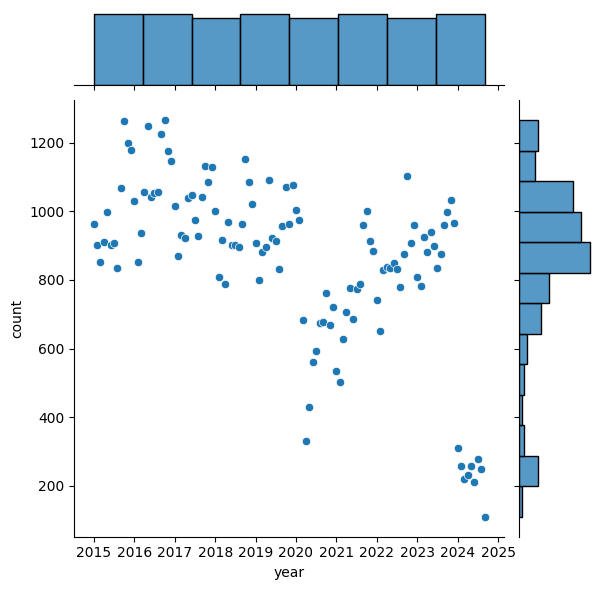

In [80]:
cont_by = pd.DataFrame({
    "count": countsDTP,
    "year": dateDTP
})

sns.jointplot(data=cont_by, x="year", y="count")

In [41]:
print(len(dateDTP), len(countsDTP))

117 117


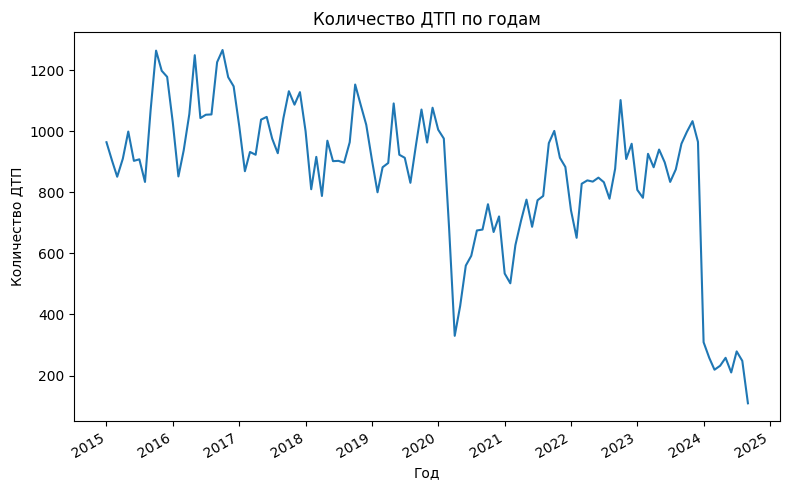

In [42]:
# plt.figure(figsize=(16,16))

date_format = mpl_dates.DateFormatter("%Y")
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(date_format)
# plt.gca().xaxis.set_major_locator(mpl_dates.DayLocator(interval=180))

plt.plot(dateDTP, countsDTP)

plt.title("Количество ДТП по годам")

plt.xticks(rotation=30, ha='right')
plt.xlabel('Год')
plt.ylabel('Количество ДТП')

plt.tight_layout()
plt.show()

In [63]:
# С 2016 по 2017 год бало больше всего аварий

left = dt.datetime(2015, 6, 1)
right = dt.datetime(2017, 1, 1)

# Определение маски для поиска даты
mask = (df['Crash Date/Time'] >= left) & (df['Crash Date/Time'] <= right)
filter_dates = df.loc[mask]

In [64]:
filter_dates['Crash Date/Time'].unique()

<DatetimeArray>
['2015-06-01 00:00:00', '2015-07-01 00:00:00', '2015-08-01 00:00:00',
 '2015-09-01 00:00:00', '2015-10-01 00:00:00', '2015-11-01 00:00:00',
 '2015-12-01 00:00:00', '2016-01-01 00:00:00', '2016-02-01 00:00:00',
 '2016-03-01 00:00:00', '2016-04-01 00:00:00', '2016-05-01 00:00:00',
 '2016-06-01 00:00:00', '2016-07-01 00:00:00', '2016-08-01 00:00:00',
 '2016-09-01 00:00:00', '2016-10-01 00:00:00', '2016-11-01 00:00:00',
 '2016-12-01 00:00:00', '2017-01-01 00:00:00']
Length: 20, dtype: datetime64[ns]

In [75]:
# Подсчитаем общее число происшествий, которое произошло на период с 2016 до 2017 года
countsDTP = []
dateDTP = []

# Определим уникальные даты и отсортируем их
uniqueDate = filter_dates['Crash Date/Time'].unique()

for i in uniqueDate:
  count = filter_dates['Crash Date/Time'].value_counts()[i]

  countsDTP.append(count)
  dateDTP.append(i)

In [76]:
cont_by = pd.DataFrame({
    "count": countsDTP,
    "year": dateDTP
})

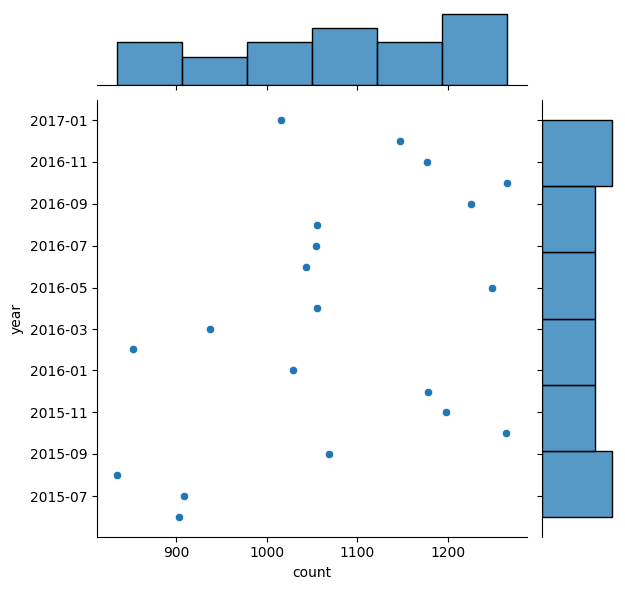

In [77]:
sns.jointplot(data=cont_by, x="count", y="year")

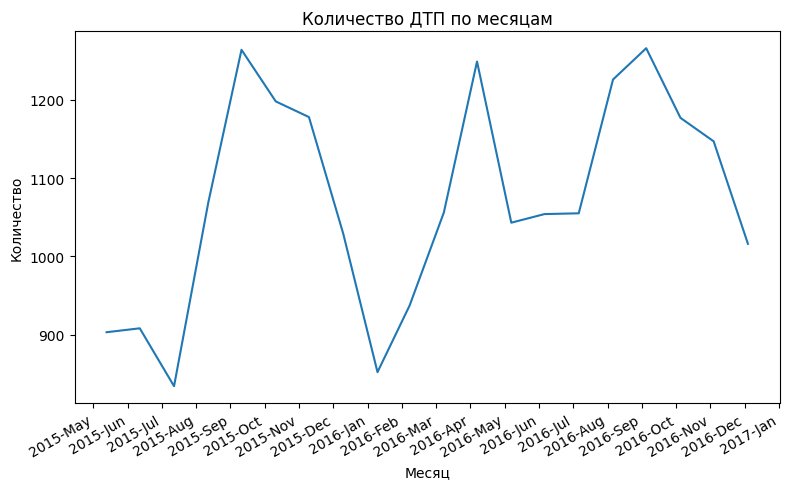

In [71]:
# На графике видим, что наибольшее число ДТП приходится на период с 2016 по 2017-е годы.
# Рассмотрим подробнее данный период (2016-2017 год)

# Определяем формат для вывода даты
date_format = mpl_dates.DateFormatter("%Y-%b")
plt.gcf().autofmt_xdate()
# Установка выбранного формата даты
plt.gca().xaxis.set_major_formatter(date_format)
# Установка периода между датами
plt.gca().xaxis.set_major_locator(mpl_dates.DayLocator(interval=31))
# Определение левой и правой границы
plt.gca().set_xbound(left, right)

plt.plot(dateDTP, countsDTP)

plt.title("Количество ДТП по месяцам")

plt.xticks(rotation=30, ha='right')
plt.xlabel('Месяц')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

In [47]:
# Детально проанализировав 2016-2017 год можно заметить, что больше всего число ДТП было в сентябре, а меньше всего - в январе.

In [48]:
df["Route Type"].unique()

<StringArray>
[                'County',       'Maryland (State)',           'Municipality',
             'US (State)',             'Government',   'Other Public Roadway',
     'Interstate (State)',           'Service Road',                   'Ramp',
                'Unknown',           'County Route', 'Maryland (State) Route',
     'Municipality Route',       'Government Route',            'Local Route',
              'Crossover',          'Private Route']
Length: 17, dtype: string

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100363 entries, 41823 to 100362
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Report Number                  100363 non-null  string        
 1   Local Case Number              100363 non-null  string        
 2   Agency Name                    100363 non-null  string        
 3   ACRS Report Type               100363 non-null  string        
 4   Crash Date/Time                100363 non-null  datetime64[ns]
 5   Route Type                     100363 non-null  string        
 6   Road Name                      100363 non-null  string        
 7   Cross-Street Name              100363 non-null  string        
 8   Collision Type                 100363 non-null  string        
 9   Weather                        100363 non-null  string        
 10  Surface Condition              100363 non-null  string        
 11  L

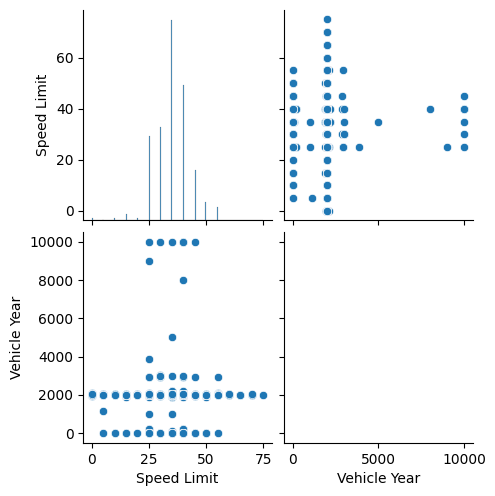

In [50]:
# Нарисуем график pair plot
cols = ['Speed Limit', 'Vehicle Year']

sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

<Axes: xlabel='count', ylabel='year'>

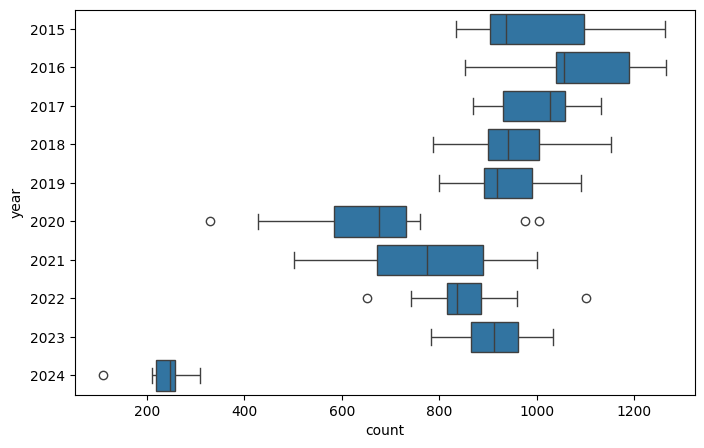

In [72]:
# Подсчитаем общее число происшествий, которое произошло по всем годам и месяцам
countsDTP = []
yearDTP = []

# Определим уникальные даты и отсортируем их
uniqueDate = df['Crash Date/Time'].unique()

counterDict = {}

for i in uniqueDate:
  count = df['Crash Date/Time'].value_counts()[i]
  year = str(i).split(' ')[0].split('-')[0]

  if not year in counterDict:
    counterDict[year] = count
  else:
    counterDict[year] += count

  countsDTP.append(count)
  yearDTP.append(year)

data_df = pd.DataFrame({
    "count": countsDTP,
    "year": yearDTP
})

# Вывод ящика с усами
sns.boxplot(y="year", x="count", data=data_df, orient="h")

<Axes: xlabel='count', ylabel='year'>

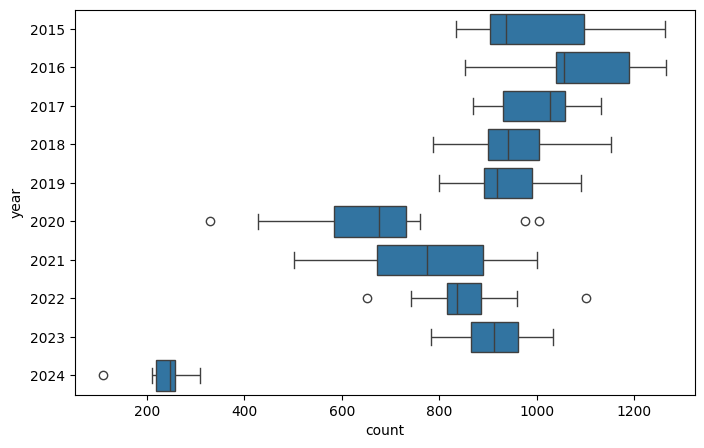

In [52]:
data_df = pd.DataFrame({
    "count": countsDTP,
    "year": yearDTP
})

# Вывод ящика с усами
sns.boxplot(y="year", x="count", data=data_df, orient="h")

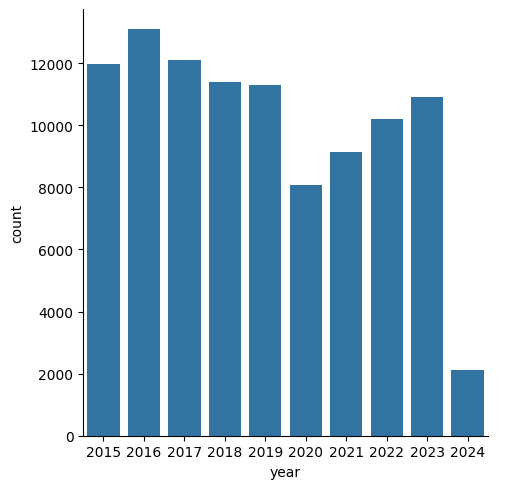

In [53]:
# Определим более точно год, в который было больше всего ДТП
count_by_date = pd.DataFrame({
    "count": list(counterDict.values()),
    "year": list(counterDict.keys())
})

sns.catplot(data=count_by_date, x="year", y="count",  kind="bar")

In [54]:
# В 2016 году было больше всего ДТП, меньше всего в 2020 (если не учитывать 2024 год)

<ipython-input-55-00e71410496a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(countsDTP)


<Axes: ylabel='Density'>

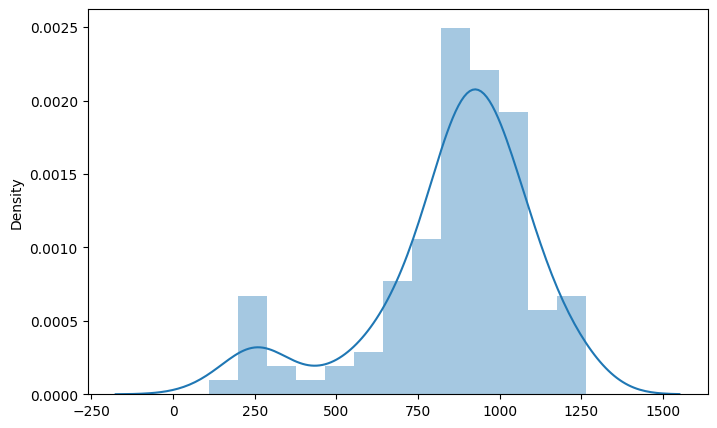

In [55]:
sns.distplot(countsDTP)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100363 entries, 41823 to 100362
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Report Number                  100363 non-null  string        
 1   Local Case Number              100363 non-null  string        
 2   Agency Name                    100363 non-null  string        
 3   ACRS Report Type               100363 non-null  string        
 4   Crash Date/Time                100363 non-null  datetime64[ns]
 5   Route Type                     100363 non-null  string        
 6   Road Name                      100363 non-null  string        
 7   Cross-Street Name              100363 non-null  string        
 8   Collision Type                 100363 non-null  string        
 9   Weather                        100363 non-null  string        
 10  Surface Condition              100363 non-null  string        
 11  L

In [57]:
df["Location"][0]

'(39.11646167, -77.05053)'

In [58]:
df["Latitude"][0]

39.11646167

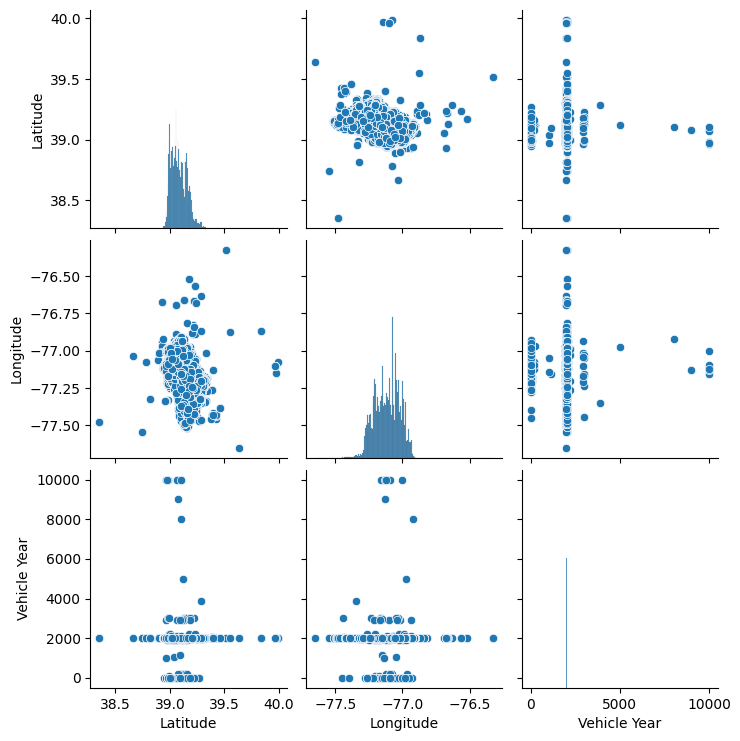

In [59]:
# Нарисуем график pair plot (scatter plot matrix)

cols = ['Latitude', 'Longitude', "Vehicle Year"]

sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

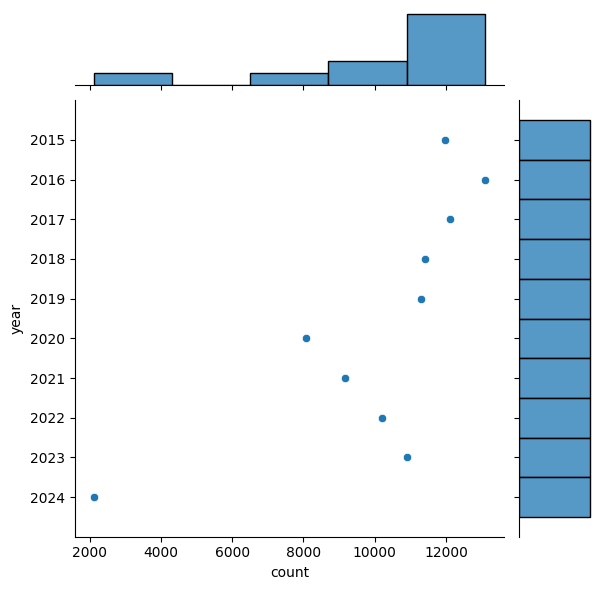

In [74]:
sns.jointplot(data=count_by_date, x="count", y="year")

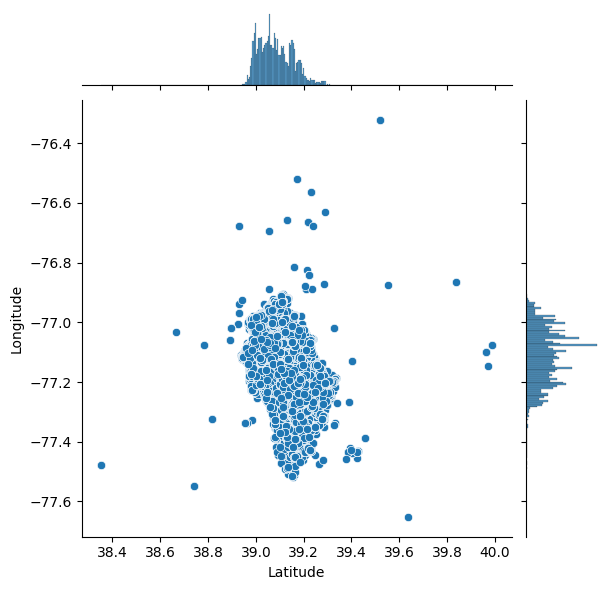

In [60]:
# Чтобы посмотреть на взаимосвязь двух численных признаков, есть ещё joint plot - гибрид scatter plot и histogram.
# Посмотрим как связаны между собой координата Latitude и Longtitude

sns.jointplot(data=df, x="Latitude", y="Longitude")